In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("0709.csv")
df

,strain,number,dots,cells
0,172,1,11,67
1,172,1,8,45
2,172,1,5,54
3,172,2,11,84
4,172,2,7,82
5,172,2,4,55
6,172,3,5,52
7,172,3,4,53
8,172,3,4,56
9,399,1,0,51


In [3]:
# calculate SE / cells (%)
df_number = df.groupby(["strain", "number"], as_index=False).sum()
df_number["SE"] = df_number["dots"] * 100 / df_number["cells"]
df_number

,strain,number,dots,cells,SE
0,172,1,24,166,14.457831
1,172,2,22,221,9.954751
2,172,3,13,161,8.074534
3,399,1,3,173,1.734104
4,399,2,4,139,2.877698
5,399,3,4,145,2.758621


In [4]:
# calculate average & sem of SE number in wt and atg18D
SE_mean = df_number.groupby("strain").mean()["SE"].values
SE_sem = df_number.groupby("strain").std()["SE"].values / np.sqrt(3)
print(SE_mean)
print(SE_sem)

[10.82903887  2.45680753]
[1.89384133 0.36298305]


## Welth's t-test

In [5]:
WT_SE = df_number[df_number["strain"] == 172]["SE"]
atg18_SE = df_number[df_number["strain"] == 399]["SE"]
statistic, atg18_pvalue = stats.ttest_ind(WT_SE, atg18_SE, equal_var=False)
print(atg18_pvalue)

0.043241225822830014


## data visualization

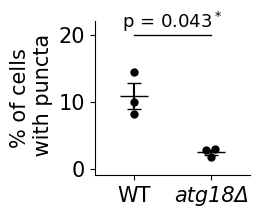

In [8]:
fig, ax = plt.subplots(figsize = (2, 2), dpi=100)

sns.swarmplot(x="strain", y="SE", data=df_number, size=6, color="black")
ax.errorbar(x=[0, 1], y=SE_mean, yerr=SE_sem, capsize=5, fmt='_', ecolor='k', ms=20, mfc='None', mec='k')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fontsize=15
y = -5
ax.text(0, y, "WT", ha="center", fontsize=fontsize)
ax.text(1, y, "atg18Δ", ha="center", fontstyle="italic", fontsize=fontsize)

ax.plot([0, 1], [20, 20], color='k', lw=1)
ax.text(0.5, 21, f'p = {atg18_pvalue:.3f}$^*$', ha='center', fontsize=fontsize-2)


ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-1, 22)
ax.set_xticklabels("")
ax.set_yticks([0, 10, 20])
ax.set_yticklabels(["0", "10", "20"], fontsize=fontsize)
ax.set_xlabel("")
ax.set_ylabel("% of cells\n with puncta", fontsize=fontsize, loc="center")
# save figure
fig.savefig("output.jpg", bbox_inches="tight")
plt.show()